<a href="https://colab.research.google.com/github/YuliiaChorna1/Data-Science-11.2-Tensorflow-Graphs-Neural-Networks-Auto-differentiation/blob/main/automatic_differentiation_extralesson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Automatic Differentiation / Автоматичне визначення похідної

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + tf.exp(-x))

x = tf.Variable(2.0)

with tf.GradientTape() as tape:
    y = sigmoid(x)
    dydx = tape.gradient(y, x)
    print(dydx)

tf.Tensor(0.104993574, shape=(), dtype=float32)


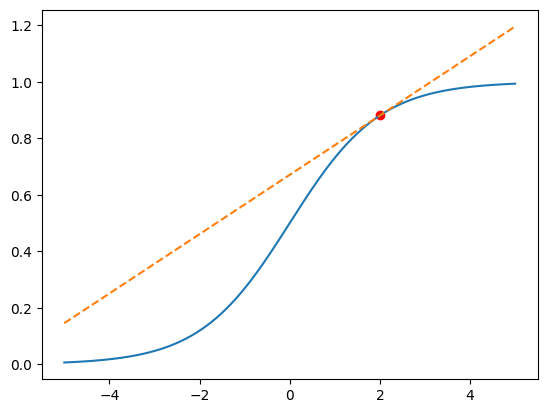

In [2]:
# Define the input range
x_values = np.linspace(-5, 5, 1000)
y_values = sigmoid(x_values)

# Tangent line equation: y = f`(x) * (x - x0) + f(x0)
tangent_line = dydx * (x_values - x) + y

plt.plot(x_values, y_values, label="Original Function")
plt.plot(x_values, tangent_line, label="Tangent Line at x = {}".format(x), linestyle="--")
plt.scatter(x, y, color="red") # Mark the point on the function
plt.show()

# Simple Neural Network

In [3]:
import tensorflow as tf


# y = w1*x + b
# y = 5*x + 5
class SimpleModule(tf.Module):
    def __init__(self, name=None):
        super().__init__(name=name)
        self.w = tf.Variable(5.0)
        self.b = tf.Variable(5.0)

    def __call__(self, x):
        return self.w * x + self.b

simple_module = SimpleModule(name="simple")

simple_module(tf.constant(5.0))#.numpy() # for clear result

<tf.Tensor: shape=(), dtype=float32, numpy=30.0>

In [8]:
class DenseLayer(tf.Module):
    def __init__(self, in_features, out_features, name=None):
        super().__init__(name=name)
        self.w = tf.Variable(
            tf.random.normal([in_features, out_features]), name="w"
        )
        print(self.w)
        self.b = tf.Variable(tf.zeros([out_features]), name="b") # Trainable variables
        print(self.b)

    def __call__(self, x):
        y = tf.matmul(x, self.w) + self.b
        return tf.nn.relu(y)


# Multi-layer perceptron
class NN(tf.Module):
    def __init__(self, name=None):
        super().__init__(name=name)

        self.layer_1 = DenseLayer(in_features=3, out_features=3)
        self.layer_2 = DenseLayer(in_features=3, out_features=1)

    def __call__(self, x):
        print("Input layer: ", x)
        print("Layer 1: ", "tf.nn.relu(", self.layer_1.w.numpy(), "*", x.numpy(), " + ", self.layer_1.b.numpy()), ")"
        x = self.layer_1(x)
        print("Layer 1 outputs: ", x)
        print("Layer 2: ", "tf.nn.relu(", self.layer_2.w.numpy(), "*", x.numpy(), " + ", self.layer_2.b.numpy()), ")"
        x = self.layer_2(x)
        print("Layer 2 outputs: ", x)
        return x

nn = NN(name="neural_network")

<tf.Variable 'w:0' shape=(3, 3) dtype=float32, numpy=
array([[ 1.7136772 , -0.03733459, -0.70087177],
       [-1.8249326 ,  0.915279  ,  0.18749723],
       [ 0.3726737 ,  1.7635863 ,  0.36706746]], dtype=float32)>
<tf.Variable 'b:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>
<tf.Variable 'w:0' shape=(3, 1) dtype=float32, numpy=
array([[1.6103338 ],
       [0.5218676 ],
       [0.22624382]], dtype=float32)>
<tf.Variable 'b:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


In [9]:
print("Results:", nn(tf.constant([[2.0, 2.0, 2.0]])))

Input layer:  tf.Tensor([[2. 2. 2.]], shape=(1, 3), dtype=float32)
Layer 1:  tf.nn.relu( [[ 1.7136772  -0.03733459 -0.70087177]
 [-1.8249326   0.915279    0.18749723]
 [ 0.3726737   1.7635863   0.36706746]] * [[2. 2. 2.]]  +  [0. 0. 0.]
Layer 1 outputs:  tf.Tensor([[0.52283657 5.283061   0.        ]], shape=(1, 3), dtype=float32)
Layer 2:  tf.nn.relu( [[1.6103338 ]
 [0.5218676 ]
 [0.22624382]] * [[0.52283657 5.283061   0.        ]]  +  [0.]
Layer 2 outputs:  tf.Tensor([[3.5989995]], shape=(1, 1), dtype=float32)
Results: tf.Tensor([[3.5989995]], shape=(1, 1), dtype=float32)


# Representing activation functions in TensorFlow

In [10]:

def identity(x):
    return x

def step(x):
    return tf.where(x > 0, 1, 0)

def sigmoid(x):
    return tf.math.sigmoid(x)

def tanh(x):
    return tf.math.tanh(x)

def arctan(x):
    return tf.math.atan(x)

def relu(x):
    return tf.nn.relu(x)

def prelu(x, alpha=0.1):
    return tf.maximum(0.0,x) + alpha * tf.minimum(0.0, x)

def softsign(x):
    return x / (1 + tf.abs(x))